In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from scipy.interpolate import lagrange
from numpy.polynomial.polynomial import Polynomial
from sklearn.metrics import mean_absolute_error

## Question 3: Sklearn

In [ ]:
#Load data function used from the previous question
def load_data(filename_with_path):
  '''
    Load input and label data from a file.

    Args:
        filename_with_path (str): The full path and name of the data file.

    Returns:
        tuple: Two numpy arrays containing the input features (X) and labels (Y).
  '''
  
  df=pd.read_csv(filename_with_path,delimiter=' ',header=None).to_numpy()
  X=df[:,:2] #All data files in this assignment have two features
  Y=df[:,2]

  return X,Y

In [ ]:
X,Y=load_data('/content/drive/MyDrive/ECE:760/hw 2/data/Dbig.txt')

In [ ]:
#Generating splits of data (D32, D128, D512, D2048, D8192)
X_8192,X_test,Y_8192,Y_test=train_test_split(X,Y,train_size=8192,stratify=Y)

In [ ]:
X_32,Y_32=X_8192[:32,:],Y_8192[:32]
X_128,Y_128=X_8192[:128,:],Y_8192[:128]
X_512,Y_512=X_8192[:512,:],Y_8192[:512]
X_2048,Y_2048=X_8192[:2048,:],Y_8192[:2048]

In [ ]:
#The task here is to train a DT model on each of these splits 
#and test them on X_test, Y_test to see if the test performance eventually improves

#Training and testing model on each of the splits and storing the performance in a dictionary
X_splits={"32":X_32,
          "128":X_128,
          "512":X_512,
          "2048":X_2048,
          "8192":X_8192
}
Y_splits={"32":Y_32,
          "128":Y_128,
          "512":Y_512,
          "2048":Y_2048,
          "8192":Y_8192
}

errors={}
num_nodes={}

for size in X_splits:
  clf=DecisionTreeClassifier(criterion='entropy')
  clf.fit(X_splits[size],Y_splits[size])
  errors[size]=1- clf.score(X_test,Y_test)
  num_nodes[size]=clf.tree_.node_count

In [ ]:
errors

{'32': 0.271570796460177,
 '128': 0.07300884955752207,
 '512': 0.0497787610619469,
 '2048': 0.03761061946902655,
 '8192': 0.020464601769911495}

In [ ]:
num_nodes

{'32': 5, '128': 27, '512': 53, '2048': 91, '8192': 227}

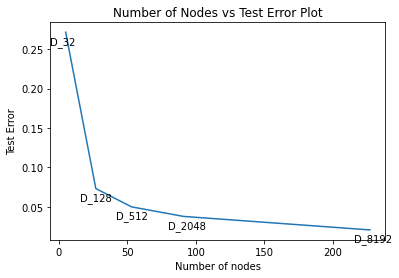

In [ ]:
#plotting the graph n vs error
plt.title('Number of Nodes vs Test Error Plot')
plt.xlabel('Number of nodes')
plt.ylabel('Test Error')

node_list=[num_nodes[i] for i in num_nodes]
error_list=[errors[i] for i in errors]
plt.plot(node_list,error_list)

for i, size in enumerate(num_nodes):
  plt.annotate("D_"+size,(node_list[i],error_list[i]),xytext=(node_list[i]-11.5,error_list[i]-0.015))

plt.savefig('/content/drive/MyDrive/ECE:760/hw 2/out_figs/q3_errorVsnode.png')

## Question 4: Lagrange Interpolation

In [ ]:
#Let a=0, b=Pi

a=0
b=np.pi

#Generating 120 points randomly from [a,b] and getting storing their sine values in 'y'
x=np.random.uniform(low=a,high=b,size=120)
y=np.sin(x)

#Splitting (x,y) into (x_train,y_train) and  (x_test,y_test). These form the initial training and the testing sets respectively
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=20,shuffle=True)

In [ ]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(100,) (20,) (100,) (20,)


In [ ]:
#Let's build the lagrange polynomial approximation for the sine distribution using x_train,y_train

poly=lagrange(x_train,y_train)

In [ ]:
#Let's calculate the predictions on the train and test data
y_pred_train=Polynomial(poly.coef[::-1])(x_train)
y_pred_test=Polynomial(poly.coef[::-1])(x_test)

In [ ]:
#Mean-Absolute error on the train set
print(f"The mean absolute error on the train set is:{mean_absolute_error(y_train,y_pred_train)}")
#Mean-Absolute error on the test set
print(f"The mean absolute error on the test set is:{mean_absolute_error(y_test,y_pred_test)}")

The mean absolute error on the train set is:5.766064785905992e+67
The mean absolute error on the test set is:1.463716495501398e+68


In [ ]:
y_train[0]

0.7894833055828325

In [ ]:
y_pred_train[0]

-1.642617331865108e+67

Noticing a vey-high MAE when using 100 points.

So, trying with a smaller train set (15 points) and a test set of 5 points

In [ ]:
#Generating 20 points randomly from [a,b] and getting storing their sine values in 'y'
x=np.random.uniform(low=a,high=b,size=20)
y=np.sin(x)

#Splitting (x,y) into (x_train,y_train) and  (x_test,y_test). These form the initial training and the testing sets respectively
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=5,shuffle=True)

In [ ]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(15,) (5,) (15,) (5,)


In [ ]:
#Let's build the lagrange polynomial approximation for the sine distribution using x_train,y_train

poly=lagrange(x_train,y_train)

In [ ]:
#Let's calculate the predictions on the train and test data
y_pred_train=Polynomial(poly.coef[::-1])(x_train)
y_pred_test=Polynomial(poly.coef[::-1])(x_test)

In [ ]:
#Mean-Absolute error on the train set
print(f"The mean absolute error on the train set is:{mean_absolute_error(y_train,y_pred_train)}")
#Mean-Absolute error on the test set
print(f"The mean absolute error on the test set is:{mean_absolute_error(y_test,y_pred_test)}")

The mean absolute error on the train set is:7.754835046246781e-05
The mean absolute error on the test set is:6.44784521690478e-05


We see that the MAE has reduced significantly when we take lesser number of points

Now, let's repeat the experiment with the same set of points, but with added zero-mean gaussian noise with different standard deviations

In [ ]:
stddev=[np.pi * x for x in [ 0.125, 0.25, 0.5, 0.75,1]]

for std in stddev:
  print(f"The standard deviation considered is:{std}")

  noise=np.random.normal(0,std,size=100) #Adding points to the training data
  x_train_new=x_train+noise

  poly=lagrange(x_train_new,y_train)
  y_pred_train=Polynomial(poly.coef[::-1])(x_train)
  y_pred_test=Polynomial(poly.coef[::-1])(x_test)

  #Mean-Absolute error on the train set
  print(f"The mean absolute error on the train set is:{mean_absolute_error(y_train,y_pred_train)}")
  #Mean-Absolute error on the test set
  print(f"The mean absolute error on the test set is:{mean_absolute_error(y_test,y_pred_test)}")

The standard deviation considered is:0.39269908169872414
The mean absolute error on the train set is:3.661584146300432e+69
The mean absolute error on the test set is:2.2564324196942475e+69
The standard deviation considered is:0.7853981633974483
The mean absolute error on the train set is:4.9115168111289655e+72
The mean absolute error on the test set is:3.036625453439215e+72
The standard deviation considered is:1.5707963267948966
The mean absolute error on the train set is:5.677339148170936e+47
The mean absolute error on the test set is:2.9233360288124813e+47
The standard deviation considered is:2.356194490192345
The mean absolute error on the train set is:2.8464381747818914e+31
The mean absolute error on the test set is:1.4801507856690453e+31
The standard deviation considered is:3.141592653589793
The mean absolute error on the train set is:5765406851921.308
The mean absolute error on the test set is:3121671279758.343


In [ ]:
x_train_new

array([ 5.74447191, -4.0654489 ,  5.62455426, -3.74366747,  5.96834915,
       -3.34885912,  5.38272482,  4.32300125, -7.12878452, -0.14068383,
        6.95515847,  6.6959526 ,  8.69713211, -3.55175839, -0.56025233,
        5.31998026,  6.63174053,  3.17315555,  7.94899425,  5.25495317,
       -2.24875607,  3.64647605,  0.46162824,  6.13512516,  3.06775346,
       -0.714168  ,  6.99197327, -0.62967093,  3.3900375 , -0.05313432,
        2.74762813,  6.55896097,  1.1212174 ,  0.73007843, -2.81944276,
        5.29161211, -1.54297865,  7.387875  , -1.77718192, -5.29824963,
        1.88049895,  1.11836912, -0.19790027,  5.20659687,  3.13801724,
       -3.90285526,  1.79166111,  1.80194279,  0.74809843,  3.15641502,
       -5.03073587, -0.78923642, -1.93293437,  4.04244043, -2.10698215,
       -1.3501505 ,  1.92620024,  5.21588816, -2.80718289,  5.14310659,
        0.14589822,  3.19032999, -3.80818644, -3.30119138, -3.38636967,
        3.93645679,  4.58664006,  3.87588629, -0.94595382, -1.09

In [ ]:
x_train_new

array([ 1.20757547, -1.6014384 , -1.03137195, -0.31257759,  1.17626101,
        7.45619448,  1.72641953,  0.28999263,  0.79144366,  2.01313594,
       -0.08598493,  2.12927363,  2.71056117, -0.80000584,  3.54930254])